<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget --no-check-certificate https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

#import requests
#headers = {'Accept': 'application/json'}
#r = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite')


Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [10]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

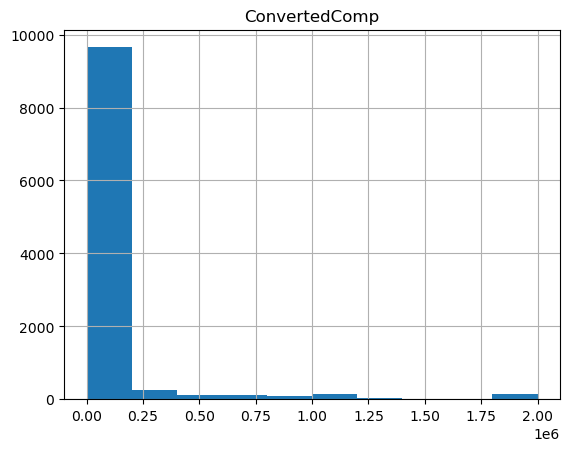

In [8]:
# your code goes here
QUERY="""
SELECT ConvertedComp FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.hist(bins=10)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

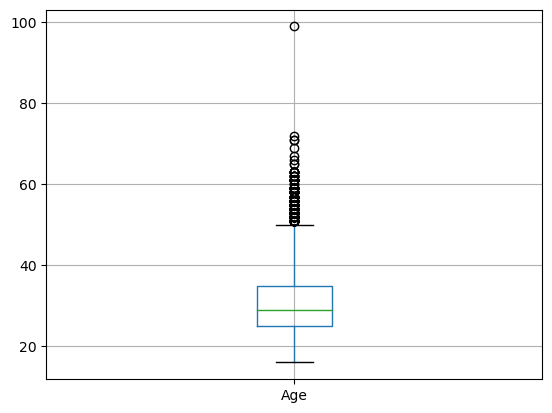

In [9]:
# your code goes here
QUERY="""
SELECT Age FROM master
"""
df1=pd.read_sql_query(QUERY, conn)
df1.boxplot()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

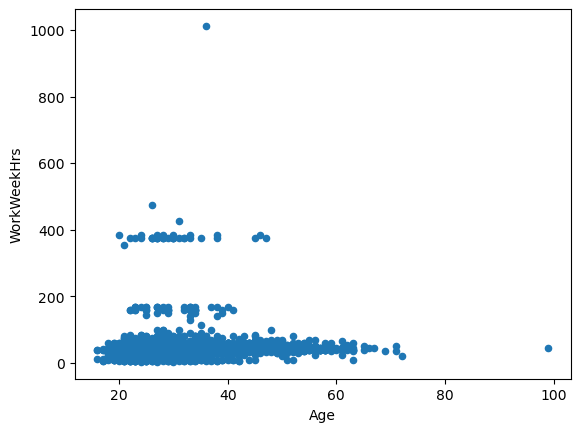

In [13]:
# your code goes here
QUERY="""
SELECT Age, WorkWeekHrs FROM master
"""
df2=pd.read_sql_query(QUERY, conn)
df2.plot.scatter(x='Age', y='WorkWeekHrs')




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


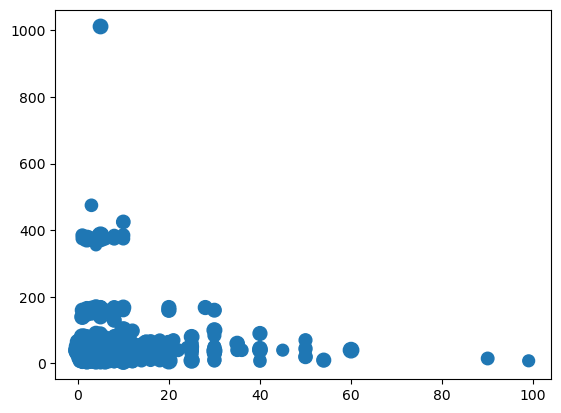

In [29]:
# your code goes here
QUERY="""
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df3=pd.read_sql_query(QUERY,conn)
plt.scatter(x='CodeRevHrs', y='WorkWeekHrs', s=df3['Age']*3, data=df3)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x23b790dcf98>,
 [Text(0.782460943602955, 0.7731460869305189, 'PostgreSQL'),
  Text(-0.6614558538043755, 0.8789062256395301, 'MongoDB'),
  Text(-1.0401617758478325, -0.35785958149123726, 'Redis'),
  Text(-0.05356333651009637, -1.0986951210330855, 'MySQL'),
  Text(0.9576877798968915, -0.5411414937298409, 'Elasticsearch')],
 [Text(0.4267968783288845, 0.42171604741664664, '24.8%'),
  Text(-0.36079410207511386, 0.47940339580338004, '20.9%'),
  Text(-0.5673609686442722, -0.1951961353588567, '19.1%'),
  Text(-0.02921636536914347, -0.5992882478362284, '18.8%'),
  Text(0.5223751526710316, -0.2951680874890041, '16.4%')])

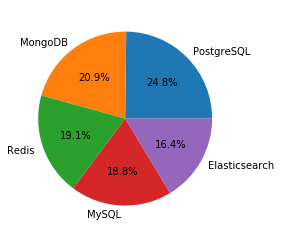

In [3]:
# your code goes here
QUERY="""
SELECT COUNT(DatabaseDesireNextYear)
as COUNT,DatabaseDesireNextYear
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5
"""
df4=pd.read_sql_query(QUERY,conn)
plt.pie(x='COUNT', labels='DatabaseDesireNextYear', autopct='%.1f%%', data=df4)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

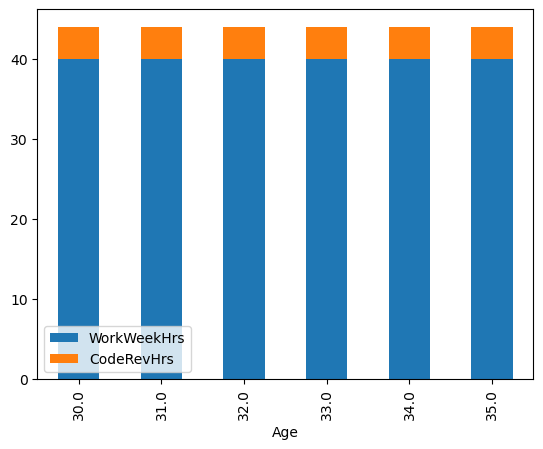

In [41]:
# your code goes here
QUERY="""
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age between 30 and 35
"""
df5=pd.read_sql_query(QUERY,conn)
df5=df5.groupby('Age').median()
df5.plot(kind='bar', stacked=True)


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

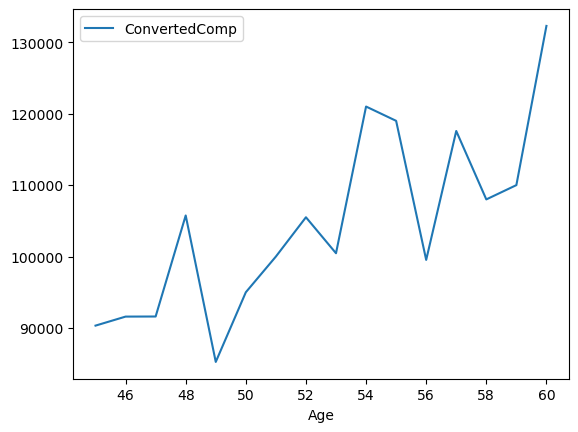

In [44]:
# your code goes here
QUERY="""
SELECT Age, ConvertedComp
FROM master
WHERE Age between 45 and 60
"""
df6=pd.read_sql_query(QUERY,conn)
df6=df6.groupby('Age').median()
df6.plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 0, 'Count')

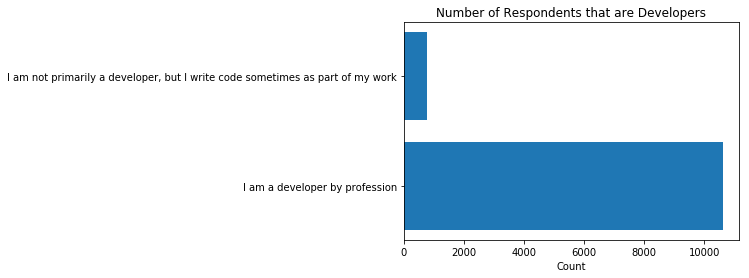

In [29]:
# your code goes here
QUERY="""
SELECT Count(MainBranch), MainBranch FROM master
GROUP BY MainBranch
"""
df7=pd.read_sql_query(QUERY, conn)
plt.barh(width='Count(MainBranch)', y='MainBranch', data=df7)
plt.title('Number of Respondents that are Developers')
plt.xlabel('Count')

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

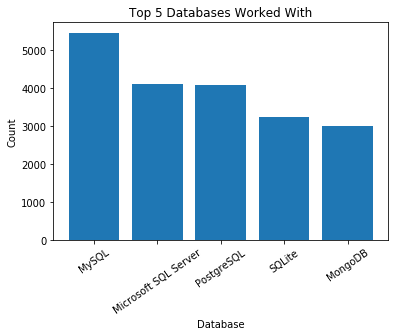

In [13]:
QUERY="""
SELECT COUNT(DatabaseWorkedWith)
as COUNT,DatabaseWorkedWith
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY COUNT(DatabaseWorkedWith) DESC LIMIT 5
"""
df8=pd.read_sql_query(QUERY,conn)

plt.bar('DatabaseWorkedWith', 'COUNT', data=df8)
plt.xlabel('Database')
plt.ylabel('Count')
plt.title('Top 5 Databases Worked With')
plt.xticks(rotation=35)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

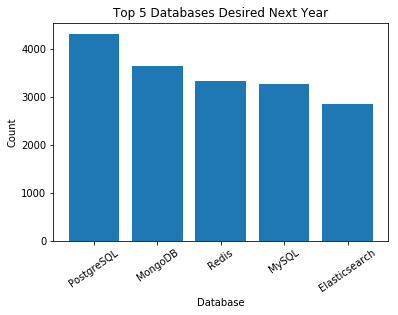

In [26]:
#df4.plot(kind='bar')
df4
plt.bar('DatabaseDesireNextYear', 'COUNT', data=df4)
plt.xlabel('Database')
plt.ylabel('Count')
plt.title('Top 5 Databases Desired Next Year')
plt.xticks(rotation=35)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

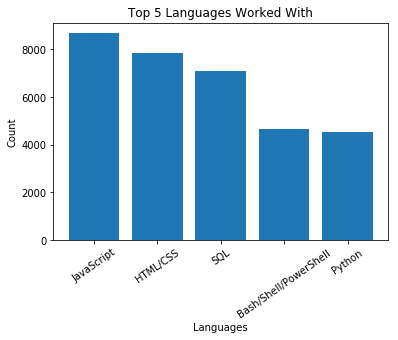

In [21]:
QUERY="""
SELECT COUNT(LanguageWorkedWith)
as COUNT,LanguageWorkedWith
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY COUNT(LanguageWorkedWith) DESC LIMIT 5
"""
df9=pd.read_sql_query(QUERY,conn)

plt.bar('LanguageWorkedWith', 'COUNT', data=df9)
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Top 5 Languages Worked With')
plt.xticks(rotation=35)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

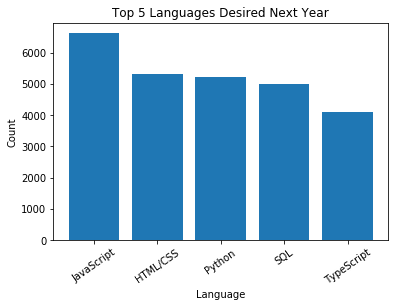

In [25]:
QUERY="""
SELECT COUNT(LanguageDesireNextYear)
as COUNT,LanguageDesireNextYear
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY COUNT(LanguageDesireNextYear) DESC LIMIT 5
"""
df10=pd.read_sql_query(QUERY,conn)

plt.bar('LanguageDesireNextYear', 'COUNT', data=df10)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 5 Languages Desired Next Year')
plt.xticks(rotation=35)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 <a list of 28 Text xticklabel objects>)

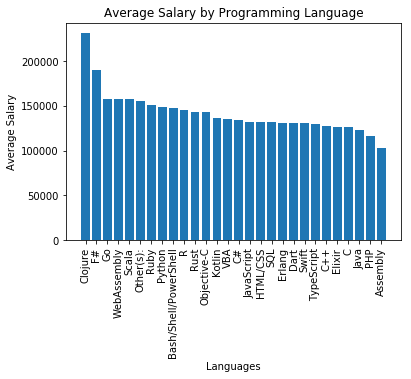

In [11]:
QUERY="""
SELECT AVG(ConvertedComp)
as AVERAGE, LanguageWorkedWith
FROM master M
JOIN LanguageWorkedWith L
ON M.Respondent=L.Respondent
GROUP BY LanguageWorkedWith
ORDER BY AVG(ConvertedComp) DESC
"""
df11=pd.read_sql_query(QUERY,conn)

plt.bar('LanguageWorkedWith', 'AVERAGE', data=df11)
plt.xlabel('Languages')
plt.ylabel('Average Salary')
plt.title('Average Salary by Programming Language')
plt.xticks(rotation=90, fontsize=10)

In [3]:
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "LanguageWorkedWith" (
"Respondent" INTEGER,
  "LanguageWorkedWith" TEXT
)


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
